<span style="color: rgb(0, 0, 0); font-family: Lato, sans-serif; font-size: 25.3333px; font-weight: 700; white-space: pre-wrap;">Superstore Sales Analysis 
</span>


<span style="color: rgb(0, 0, 0); font-family: Lato, sans-serif; font-size: 17.3333px; font-weight: 700; white-space: pre-wrap;"> Overview 
</span>

The United States retail gloabal superstore with branches in many states, selling a wide range of product categories.  And the market is becoming more competitive, so gaining additional insights from data analysis is critical.

<span style="color: rgb(0, 0, 0); font-family: Lato, sans-serif; font-size: 17.3333px; font-weight: 700; white-space: pre-wrap;"> Data Source  
</span>
- Dataset stores information about sales invoices over 4 years.
- The data include 9800 observations.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

<span style="color: rgb(0, 0, 0); font-family: Lato, sans-serif; font-size: 17.3333px; font-weight: 700; white-space: pre-wrap;">Import Data 
</span>

In [2]:
path = 'C:/Users/USER/python/project/superstore_sales/dataset.csv'

In [3]:
cols = ['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_ID', 
        'Customer_Name', 'Segment', 'Country', 'City', 'State',  'Postal_Code', 'Region',
        'Product_ID', 'Category', 'Subcategory', 'Product_Name', 'Sales']

In [4]:
df = pd.read_csv(path)
df = df.rename(columns={"Row ID":"Row_ID", "Order ID":"Order_ID", "Order Date":"Order_Date", "Ship Date":"Ship_Date", 
        "Ship Mode":"Ship_Mode", "Customer ID":"Customer_ID", "Customer Name":"Customer_Name", "Postal Code":"Postal_Code", 
        "Product ID":"Product_ID", "Sub-Category":"Subcategory","Product Name":"Product_Name"})
df

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Subcategory,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


<span style="color: rgb(0, 0, 0); font-family: Lato, sans-serif; font-size: 17.3333px; font-weight: 700; white-space: pre-wrap;">EDA 
</span>

In [5]:
def parse_date(date_str):
    for fmt in ('%d/%m/%Y', '%m/%d/%Y'):
        try:
            return dt.strptime(date_str, fmt)
        except ValueError:
            pass
    raise ValueError(f"Date format not recognized: {date_str}")

df['Order_Date'] = df['Order_Date'].apply(parse_date)
df['Ship_Date'] = df['Ship_Date'].apply(parse_date)
df

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Subcategory,Product_Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [6]:
df = df.fillna(0)
df['Postal_Code'] = df['Postal_Code'].astype(int)
df

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Subcategory,Product_Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [7]:
df.dtypes

Row_ID                    int64
Order_ID                 object
Order_Date       datetime64[ns]
Ship_Date        datetime64[ns]
Ship_Mode                object
Customer_ID              object
Customer_Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal_Code               int32
Region                   object
Product_ID               object
Category                 object
Subcategory              object
Product_Name             object
Sales                   float64
dtype: object

**Connect SQL Server to Python**

In [7]:
import pyodbc as odbc 

In [8]:
odbc.drivers()

['SQL Server',
 'SQL Server Native Client 11.0',
 'SQL Server Native Client RDA 11.0',
 'ODBC Driver 17 for SQL Server',
 'Microsoft Access Driver (*.mdb, *.accdb)',
 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)',
 'Microsoft Access Text Driver (*.txt, *.csv)',
 'Microsoft Access dBASE Driver (*.dbf, *.ndx, *.mdx)']

In [9]:
# Connect to SQL Server
conn = odbc.connect(  'Driver={SQL Server};'
                      'Server=LAPTOP-MNGSRBSS\THUYNGA;'
                      'Database=db_project;'
                      'Trusted_Connection=yes;')
cursor = conn.cursor()

In [10]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Subcategory',
       'Product_Name', 'Sales'],
      dtype='object')

In [42]:
# Create Table 
cursor.execute('''
		CREATE TABLE W_SALES_REV_F (
			Row_ID int,
			Order_ID nvarchar(250),
			Order_Date Datetime, 
            Ship_Date Datetime, 
            Ship_Mode nvarchar(250),
            Customer_ID nvarchar(250),
            Customer_Name nvarchar(250),
            Segment nvarchar(250),
            Country nvarchar(250),
            City nvarchar(250),
            State nvarchar(250),
            Postal_Code int,
            Region nvarchar(250), 
            Product_ID nvarchar(250), 
            Category nvarchar(250), 
            Subcategory nvarchar(250),
            Product_Name nvarchar(250),
            Sales float
			)
               ''')


In [43]:
# Insert Data to Table
for row in df.itertuples():
    cursor.execute('''
                INSERT INTO W_SALES_REV_F (
                    Row_ID, Order_ID, Order_Date, Ship_Date, Ship_Mode, Customer_ID, 
                    Customer_Name, Segment, Country, City, State, Postal_Code, 
                    Region, Product_ID, Category, Subcategory, Product_Name, Sales)
                VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)
                ''',
                row.Row_ID, 
                row.Order_ID, 
                row.Order_Date, 
                row.Ship_Date, 
                row.Ship_Mode, 
                row.Customer_ID, 
                row.Customer_Name, 
                row.Segment, 
                row.Country, 
                row.City, 
                row.State, 
                row.Postal_Code, 
                row.Region, 
                row.Product_ID, 
                row.Category, 
                row.Subcategory, 
                row.Product_Name, 
                row.Sales
                )
conn.commit()

**Visualize Sales Performance**

In [59]:
from IPython.display import display, Markdown, Image
display(Markdown("[Sales Performance Tracking](https://app.powerbi.com/groups/me/reports/14486627-34cb-4397-8a01-c5da66a8a259/f625b84fbb3254544e0c?experience=power-bi)"))

[Sales Performance Tracking](https://app.powerbi.com/groups/me/reports/14486627-34cb-4397-8a01-c5da66a8a259/f625b84fbb3254544e0c?experience=power-bi)

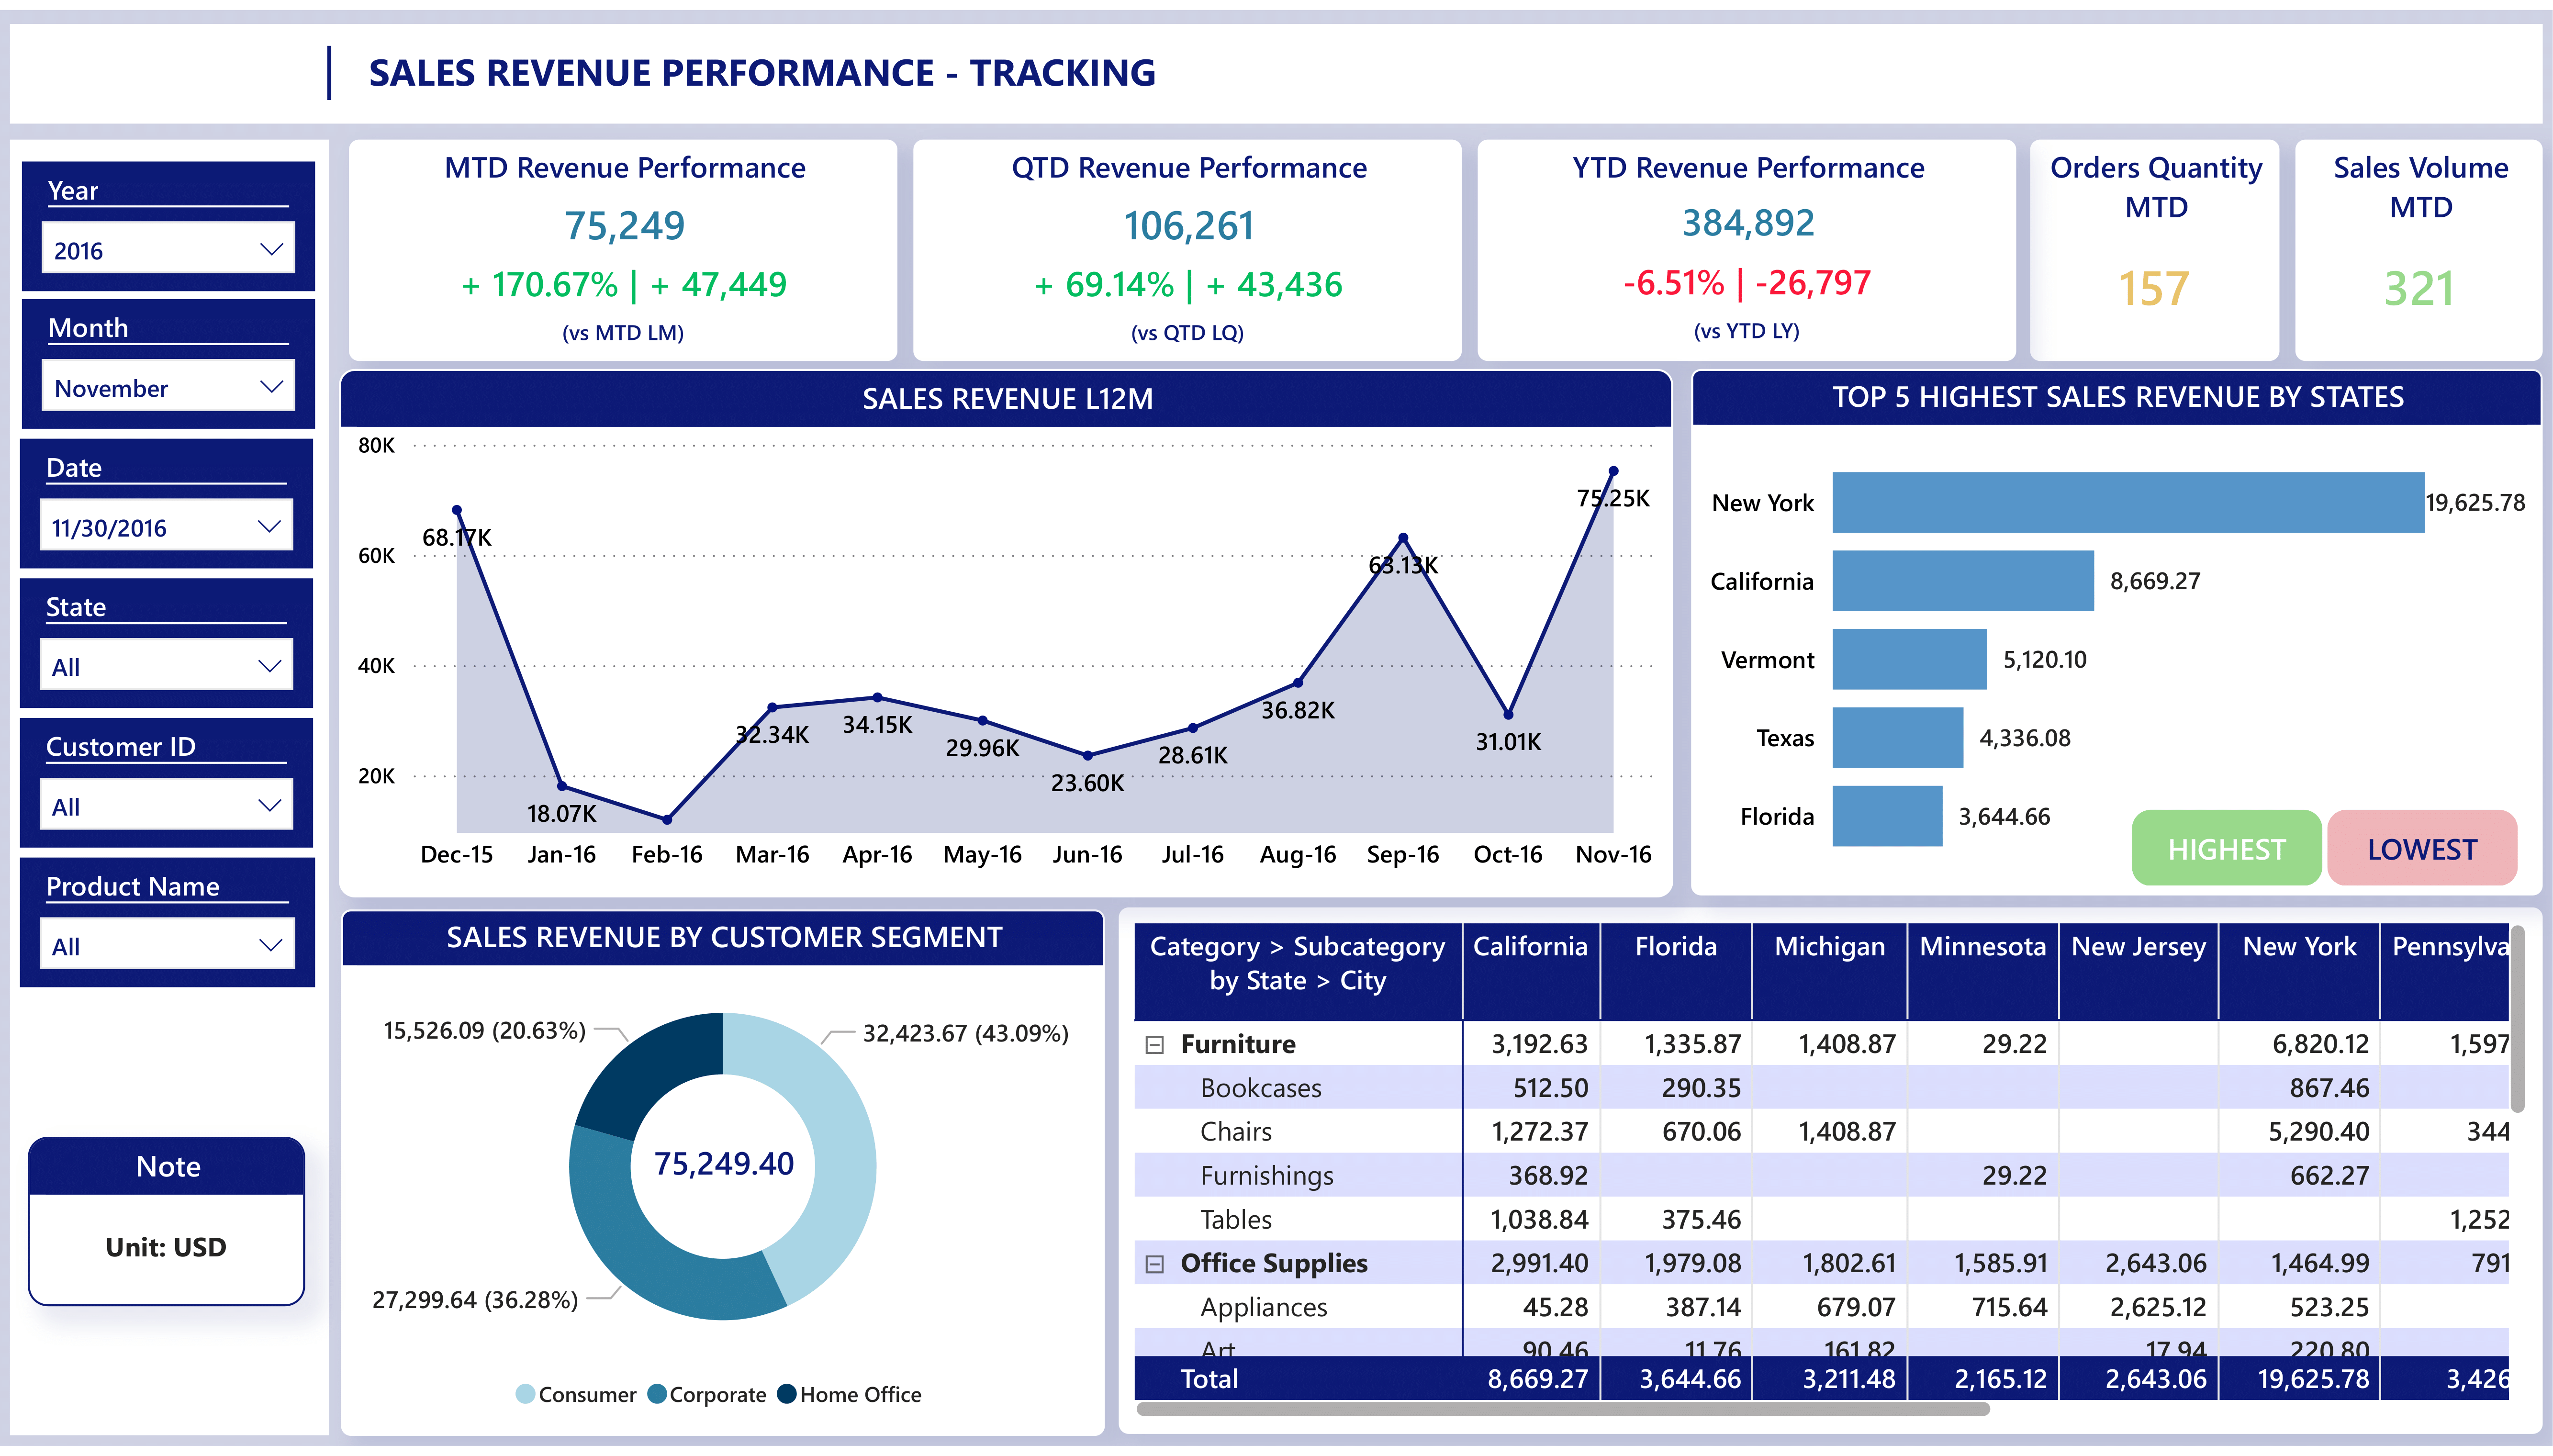

In [63]:
display(Image("C:/Users/USER/python/project/superstore_sales/Sales Analysis.png"))

**Sales Forecast**

In [8]:
monthly_sales = df.loc[:,['Order_Date','Sales']]
monthly_sales['Order_Date'] = monthly_sales['Order_Date'].dt.to_period("M")
monthly_sales['Order_Date']= monthly_sales['Order_Date'].dt.to_timestamp()
monthly_sales

,Order_Date,Sales
0,2017-11-01,261.9600
1,2017-11-01,731.9400
2,2017-06-01,14.6200
3,2016-10-01,957.5775
4,2016-10-01,22.3680
...,...,...
9795,2017-05-01,3.7980
9796,2016-01-01,10.3680
9797,2016-01-01,235.1880
9798,2016-01-01,26.3760


In [10]:
sales_group = monthly_sales.groupby('Order_Date').sum()
sales_group.head(10)

,Sales
Order_Date,
2015-01-01,14205.7070
2015-02-01,4519.8920
2015-03-01,55205.7970
2015-04-01,27906.8550
2015-05-01,23644.3030
2015-06-01,34322.9356
2015-07-01,33781.5430
2015-08-01,27117.5365
2015-09-01,81623.5268


Text(0.5, 1.0, 'Total Sales Monthly')

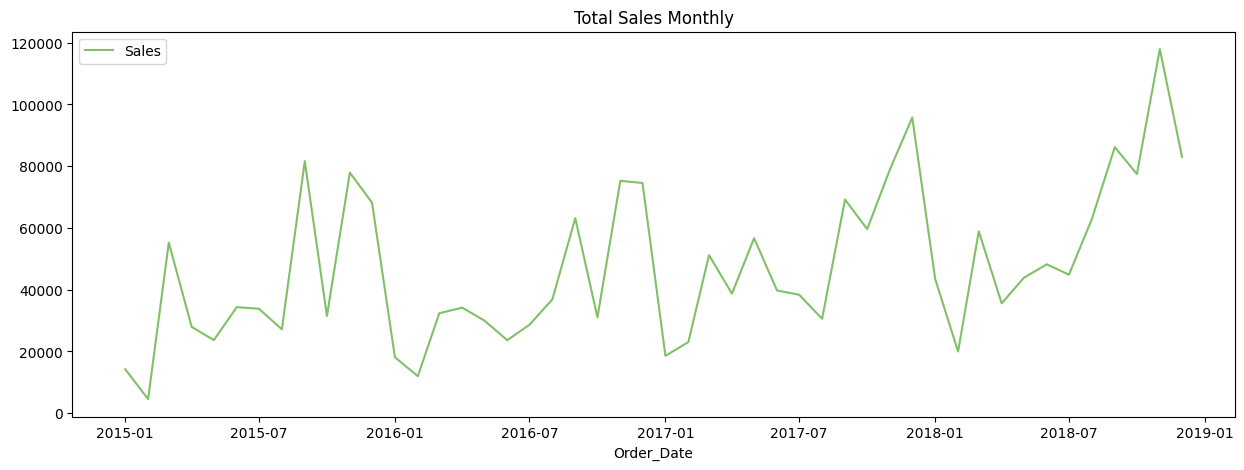

In [11]:
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(data = sales_group, palette='summer')
plt.title('Total Sales Monthly')

<span style="color: rgb(0, 0, 0); font-family: Lato, sans-serif; font-size: 17.3333px; font-weight: 700; white-space: pre-wrap;"> Check for stationarity of data
</span>

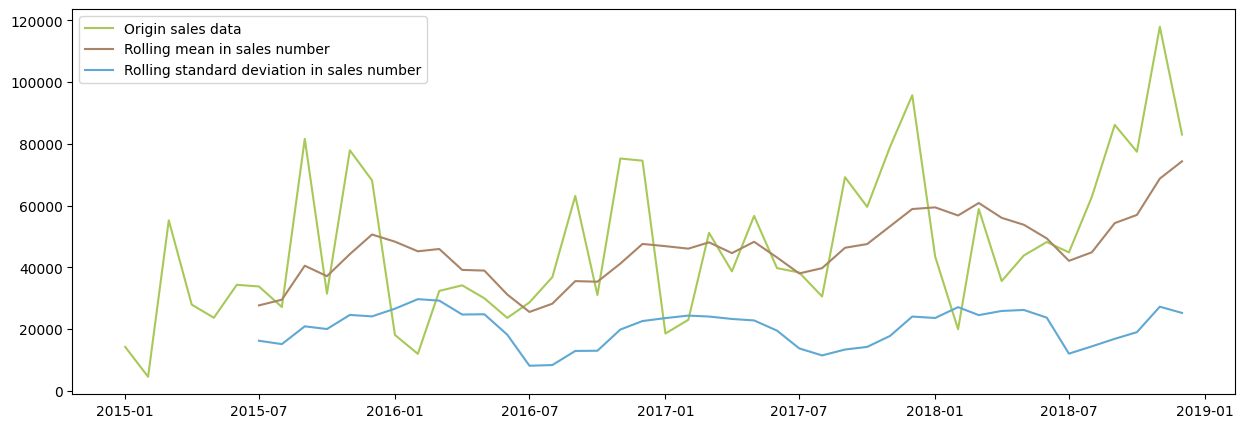

In [12]:
rolling_mean = sales_group.rolling(7).mean()
rolling_std = sales_group.rolling(7).std()

fig, ax = plt.subplots(figsize=(15,5))
plt.plot(sales_group, color = '#a7c957', label = "Origin sales data")
plt.plot(rolling_mean, color = '#a98467', label = "Rolling mean in sales number")
plt.plot(rolling_std, color = '#5fa8d3', label = "Rolling standard deviation in sales number")
plt.legend(loc="best")

In [13]:
from statsmodels.tsa.stattools import adfuller
adft = adfuller(sales_group, autolag = "AIC")
output = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , 
                          "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
output


,Values,Metric
0,-4.416137,Test Statistics
1,0.000278,p-value
2,0.000000,No. of lags used
3,47.000000,Number of observations used
4,-3.577848,critical value (1%)
5,-2.925338,critical value (5%)
6,-2.600774,critical value (10%)


We can see that our data is stationarity from the fact that p-value < 0.05 and the ADF statistic is smaller than the critical value.

<span style="color: rgb(0, 0, 0); font-family: Lato, sans-serif; font-size: 17.3333px; font-weight: 700; white-space: pre-wrap;"> Check for autocorrelation of data
</span>

In [14]:
# Calculate the autocorrelation for a one-month lag
autocorr_lag1 = sales_group['Sales'].autocorr(lag=1)
print("The autocorrelation for a one-month lag:", autocorr_lag1)

# Calculate the autocorrelation for a three-month lag
autocorr_lag3 = sales_group['Sales'].autocorr(lag=3)
print("The autocorrelation for a three-month lag:", autocorr_lag3)

# Calculate the autocorrelation for a six-month lag
autocorr_lag6 = sales_group['Sales'].autocorr(lag=6)
print("The autocorrelation for a six-month lag:", autocorr_lag6) 

# Calculate the autocorrelation for a nine-month lag
autocorr_lag9 = sales_group['Sales'].autocorr(lag=9)
print("The autocorrelation for a nine-month lag:", autocorr_lag9) 

The autocorrelation for a one-month lag: 0.3900835275608048
The autocorrelation for a three-month lag: 0.2320606474897005
The autocorrelation for a six-month lag: 0.11810681837613989
The autocorrelation for a nine-month lag: 0.05589510411625935


<Figure size 800x600 with 0 Axes>

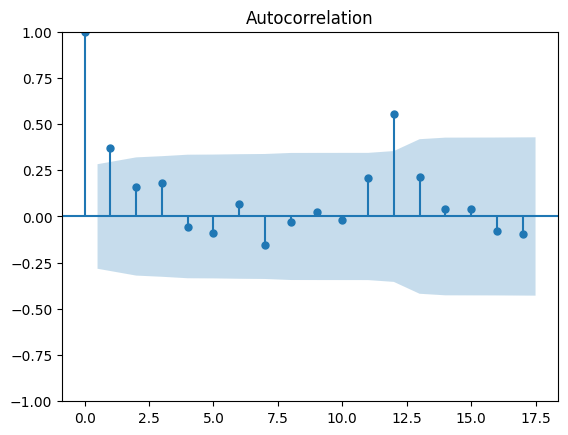

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize = (8, 6))
ax1 = plot_acf(sales_group)

<span style="color: rgb(0, 0, 0); font-family: Lato, sans-serif; font-size: 17.3333px; font-weight: 700; white-space: pre-wrap;"> Forecasting
</span>

In [16]:
#Split data into training and testing set
sales_group['Order_Date'] = sales_group.index
train = sales_group[sales_group['Order_Date'] < pd.to_datetime("2018-01", format='%Y-%m')]
train['train'] = train['Sales']
del train['Order_Date']
del train['Sales']
test = sales_group[sales_group['Order_Date'] >= pd.to_datetime("2018-01", format='%Y-%m')]
del test['Order_Date']
test['test'] = test['Sales']
del test['Sales']

C:\Users\USER\AppData\Local\Temp\ipykernel_13076\3679908053.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['train'] = train['Sales']
C:\Users\USER\AppData\Local\Temp\ipykernel_13076\3679908053.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['test'] = test['Sales']


In [ ]:
from pmdarima.arima import auto_arima
model = auto_arima(train, start_p = 0, start_q = 0, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = 1, D = 2, trace = True, 
                          error_action ='ignore',   
                          suppress_warnings = True,   
                          stepwise = True)           
model.fit(train)
model.summary()

c:\Users\USER\python\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\USER\python\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\USER\python\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\USER\python\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,2,1)[12]             : AIC=253.775, Time=0.11 sec
 ARIMA(0,1,0)(0,2,0)[12]             : AIC=257.610, Time=0.10 sec
 ARIMA(1,1,0)(1,2,0)[12]             : AIC=255.235, Time=0.11 sec


c:\Users\USER\python\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,2,1)[12]             : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(1,2,1)[12]             : AIC=255.690, Time=0.11 sec


c:\Users\USER\python\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\USER\python\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,2,2)[12]             : AIC=255.334, Time=0.18 sec
 ARIMA(0,1,0)(1,2,0)[12]             : AIC=254.698, Time=0.05 sec


c:\Users\USER\python\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\USER\python\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,2,2)[12]             : AIC=257.106, Time=0.23 sec
 ARIMA(1,1,0)(0,2,1)[12]             : AIC=254.355, Time=0.08 sec


c:\Users\USER\python\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\USER\python\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,2,1)[12]             : AIC=inf, Time=0.53 sec
 ARIMA(0,1,0)(0,2,1)[12] intercept   : AIC=256.236, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,2,1)[12]          
Total fit time: 1.891 seconds


c:\Users\USER\python\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\USER\python\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   36
Model:             SARIMAX(0, 1, 0)x(0, 2, [1], 12)   Log Likelihood                -124.887
Date:                              Fri, 14 Feb 2025   AIC                            253.775
Time:                                      15:50:31   BIC                            254.570
Sample:                                  01-01-2015   HQIC                           253.273
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.5094      0.519     -0.982      0.326      -1.526       0.507
sigma2      6.017e+08   2.17e-10   2.77e+18      0.000    6.02e+08    6.02e+08
===================================================================================
Ljung-Box (L1) (Q):                   3.05   Jarque-Bera (JB):                 0.78
Prob(Q):                              0.08   Prob(JB):                         0.68
Heteroskedasticity (H):               2.05   Skew:                            -0.41
Prob(H) (two-sided):                  0.50   Kurtosis:                         1.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.8e+35. Standard errors may be unstable.
"""

In [23]:
end = len(test)
forecast = model.predict(n_periods=end)
forecast

c:\Users\USER\python\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


2018-01-01     22174.353075
2018-02-01     31385.042864
2018-03-01     62906.489722
2018-04-01     46926.648434
2018-05-01     75330.871868
2018-06-01     50258.228066
2018-07-01     47029.376335
2018-08-01     34200.723721
2018-09-01     79543.456339
2018-10-01     78562.516315
2018-11-01     91877.246811
2018-12-01    118130.810978
Freq: MS, dtype: float64

ValueError: Input could not be cast to an at-least-1D NumPy array

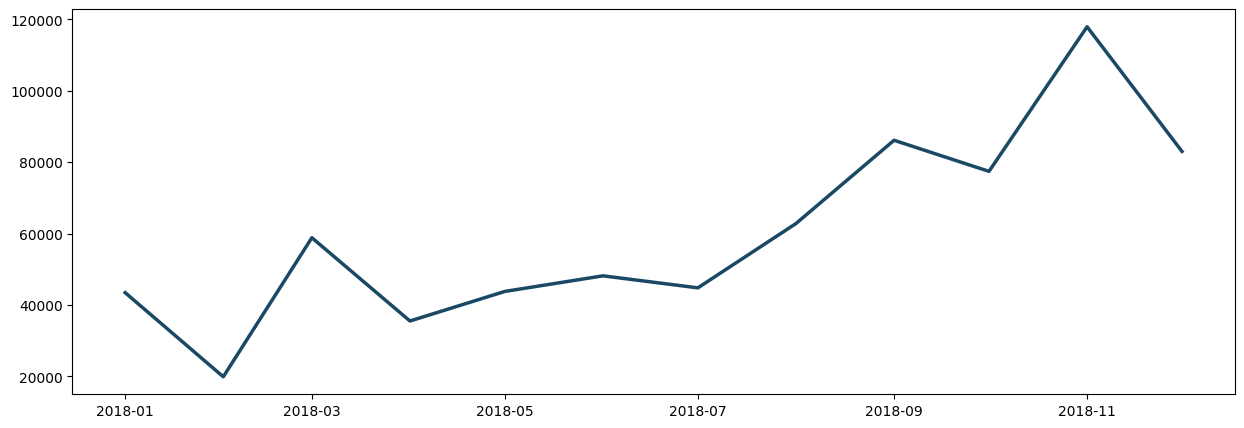

In [22]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(test['test'], color = '#1b4965', label = "Actual Value", linewidth=2.5)
plt.plot(forecast, color = '#ee964b', label = "Forecast Value", linewidth=2.5)
plt.legend(loc="best")

<span style="color: rgb(0, 0, 0); font-family: Lato, sans-serif; font-size: 17.3333px; font-weight: 700; white-space: pre-wrap;"> Evaluating forecast result 
</span>

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tools.eval_measures import rmse 
  
# Calculate root mean squared error 
rmse = rmse(test['test'], forecast) 
  
# Calculate mean squared error 
mse = mean_squared_error(test, forecast) 

#Calculate mean absolute error
mae = mean_absolute_error(test, forecast)

#Calculate mean absolute percentage error
mape = mean_absolute_percentage_error(test, forecast)

print("RMSE:", rmse)
print("MSE:", mse)
print("MAE:", mae)
print("MAPE:", mape)

RMSE: 19384.43701404526
MSE: 375756398.3514879
MAE: 15124.40961960073
MAPE: 0.2879949276399378


- The range of oscillation of the forecast value around the actual value is 19088.85
- Mean error between the forecast value and the actual value is 15124,41
- The difference between the predicted value and the actual value is 28.80%